In [3]:
import pandas as pd
import gspread as gs
import gspread_dataframe as gd
from oauth2client.service_account import ServiceAccountCredentials

In [2]:
# setup
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('nutritionKey.json', scope)
client = gspread.authorize(creds)

# Getting data

In [35]:
sheet = client.open('nutrition')
sheet_instance = sheet.worksheet('main')

In [36]:
records_df = gd.get_as_dataframe(sheet_instance)

In [37]:
records_df.head()

,date,weight,mood,calories,carbs,protein,fat,calories_burnt,steps,push_ups
0,12/29/2021,72.5,Happy,1400,20,89,50,300,5000,10
1,12/30/2021,73.0,Sad,1405,25,94,55,305,5005,15
2,12/31/2021,73.5,Stressed,1410,30,99,60,310,5010,20
3,1/1/2022,74.0,Ok,1415,35,104,65,315,5015,25
4,1/2/2022,74.5,Happy,1420,40,109,70,320,5020,30


# Adding data

In [39]:
sample_sheet = sheet.worksheet('sample')
sample_sheet_df = gd.get_as_dataframe(sample_sheet)

In [40]:
sample_sheet_df.tail()

,date,weight,mood,calories,carbs,protein,fat,calories_burnt,steps,push_ups
21,1/19/2022,83.0,Sad,1505,125,194,155,405,5105,115
22,1/20/2022,83.5,Ok,1510,130,199,160,410,5110,120
23,1/21/2022,84.0,Happy,1515,135,204,165,415,5115,125
24,1/22/2022,84.5,Sad,1520,140,209,170,420,5120,130
25,1/23/2022,85.0,Ok,1525,145,214,175,425,5125,135


In [41]:
new_records = pd.DataFrame({'date': '1/24/2022', 'weight': 85.5, 'mood': 'Stressed', 'calories': 2550, 'carbs': 150, 
                            'protein': 217, 'fat': 180, 'calories_burnt': 430, 'steps': 5130, 'push ups': 140}, index = [0])

new_records

,date,weight,mood,calories,carbs,protein,fat,calories_burnt,steps,push ups
0,1/24/2022,85.5,Stressed,2550,150,217,180,430,5130,140


In [43]:
updated = sheet_df.append(new_records)
gd.set_with_dataframe(sample_sheet, updated)

In [47]:
sample_sheet_df = gd.get_as_dataframe(sample_sheet)
sample_sheet_df.tail()

,date,weight,mood,calories,carbs,protein,fat,push ups,calories_burnt,steps
21,1/19/2022,83.0,Sad,1505,125,194,155,405,5105.0,115.0
22,1/20/2022,83.5,Ok,1510,130,199,160,410,5110.0,120.0
23,1/21/2022,84.0,Happy,1515,135,204,165,415,5115.0,125.0
24,1/22/2022,84.5,Sad,1520,140,209,170,420,5120.0,130.0
25,1/23/2022,85.0,Ok,1525,145,214,175,425,5125.0,135.0


# Data types

In [12]:
records_df = pd.read_csv('nutrition - sample.csv')
records_df.head()

,date,weight,mood,calories,carbs,protein,fat,calories_burnt,steps,push_ups
0,12/29/2021,72.5,Happy,1400,20,89,50,300,5000,10
1,12/30/2021,73.0,Sad,1405,25,94,55,305,5005,15
2,12/31/2021,73.5,Stressed,1410,30,99,60,310,5010,20
3,1/1/2022,74.0,Ok,1415,35,104,65,315,5015,25
4,1/2/2022,74.5,Happy,1420,40,109,70,320,5020,30


In [67]:
records_df['date'] = pd.to_datetime(records_df['date'])
records_df['weight'] = pd.to_numeric(records_df['weight'])
records_df['date_only'] = records_df['date'].dt.date

In [69]:
records_df.head()

,date,weight,mood,calories,carbs,protein,fat,calories_burnt,steps,push_ups,date_only
0,2021-12-29,72.5,Happy,1400,20,89,50,300,5000,10,2021-12-29
1,2021-12-30,73.0,Sad,1405,25,94,55,305,5005,15,2021-12-30
2,2021-12-31,73.5,Stressed,1410,30,99,60,310,5010,20,2021-12-31
3,2022-01-01,74.0,Ok,1415,35,104,65,315,5015,25,2022-01-01
4,2022-01-02,74.5,Happy,1420,40,109,70,320,5020,30,2022-01-02


In [89]:
t = records_df.loc[:, ['date', 'carbs', 'protein', 'fat']].melt(id_vars='date', var_name = 'macro', value_name = 'grams')
t.sort_values('date').head(10)

,date,macro,grams
0,2021-12-29,carbs,20
20,2021-12-29,fat,50
10,2021-12-29,protein,89
1,2021-12-30,carbs,25
21,2021-12-30,fat,55
11,2021-12-30,protein,94
2,2021-12-31,carbs,30
22,2021-12-31,fat,60
12,2021-12-31,protein,99
3,2022-01-01,carbs,35


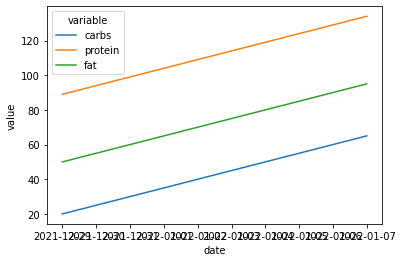

In [86]:
sns.lineplot(x = t['date'], y = t['value'], hue = t['variable'])
plt.show()